<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Codes_in_Evaluation/Sobel_better_than_cany_edge_fantastic_abril_16_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.neural_network import MLPClassifier
import sklearn
from scipy import ndimage as ndi
from skimage import feature
from sklearn.externals import joblib
from skimage import measure

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021


In [6]:
!ls

ANN_Ajuste_mar_2021
ANN_FIND_GRAIN_MAR_2021.py
ANN_FIND_GRAIN_NOVO.py
ANN_FIND_GRAIN_PAPER_STEP_02.py
big_segment.py
CNN_classify_grain_feb_15_2021.ipynb
CNN_DESCRIPTION.ipynb
CNN_FIND_GRAIN_PAPER_STEP_02.py
Codes_in_Evaluation
Doutorado
EPOCHS_graphic.csv
EPOCHS_graphic.txt
Fig_05_BIG_Segmentation_jan_25_2021.ipynb
GetBetterSegm.py
Get_PSDArea_New.py
Graphic_Epochs_fev_09_2020.ipynb
histogram_fev_2021.py
PSD_CNN_GRAIN_NOT_GRAIN_step_02_paper.ipynb
PSD_GRAIN_NOT_GRAIN_dez_04_2020.ipynb
PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_11_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_12_2021.ipynb
PSD_GRAIN_NOT_GRAIN_step_02_paper.ipynb
psd_mahotas.py
__pycache__
README.md
Segment_Ajuste_mar_2021
SEGMENT_NOT_CONCLUDED.ipynb


In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado


In [8]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.


In [10]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021


In [11]:
from big_segment import Segmenta  # got image provided segmented
# from ANN_FIND_GRAIN_NOVO import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [12]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021
%cd ANN_Ajuste_mar_2021

fatal: destination path 'ANN_Ajuste_mar_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021


In [13]:
from ANN_FIND_GRAIN_change_ann import AnnGrain  # got image provided segmented

In [14]:
!ls

ANN_Ajuste_mar_2021
ANN_deploy_neural_network_mar_22_2021.ipynb
ANN_FIND_GRAIN_change_ann.py
ANN_load_neural_network_mar_23_2021.ipynb
ANN_load_top_okay_neural_network_mar_23_2021.ipynb
ANN_neural_network_load_mar_22_2021.ipynb
big_segment_new.py
Doutorado
kNN_deploy_abril_09_2021.ipynb
knn_find_grain_change_classification.py
kNN_load_abril_09_2021.ipynb
PSD_find_neural_network_mar_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_kNN_abril_07_2021.ipynb
PSD_GRAIN_NOT_GRAIN_kNN_abril_09_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_18_2021.ipynb
__pycache__


In [15]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado


In [16]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [17]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado


In [18]:
y_valor=df['Type']

quantidade= df.groupby('Type').size()

df_G = df[df["Type"] == "G"] 
Cut=['Unnamed: 0','Type','Width']
FotosG= df_G.drop(Cut,axis=1)


Size=28
img_G=[]

Num,cols=FotosG.shape
for i in range(Num):
  data=np.array(FotosG.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_G.append(img28)

df_Z = df[df["Type"] == "Z"] 
Cut=['Unnamed: 0','Type','Width']
FotosZ= df_Z.drop(Cut,axis=1)

# We'll choose which is grain and withdraw from 750 segmented photos

Size=28
img_Z=[]

Num,cols=FotosZ.shape
for i in range(Num):
  data=np.array(FotosZ.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_Z.append(img28)

GRAO=[0,146,149,166,217,222,223,257,268,286,455,482,538,612,644,647,651,677] # 0 ate 749
GRAO=np.array(GRAO)
Ind=FotosZ.index
FotosNG=FotosZ.copy()
for i in GRAO:
  FotosNG=FotosNG.drop(Ind[i])

PERCENT=245.0/(len(FotosNG.index))
FotosNG=FotosNG.sample(frac=PERCENT, replace=True)

rows,col=FotosG.shape
y_total=[] # grao-->zero, nao grao-->1
for i in range(rows):
  y_total.append(0) #  # grao-->zero
for i in range(rows,(2*rows)):
  y_total.append(1) #  # nao grao-->zero

frames = [FotosG,FotosNG]
result = np.array(pd.concat(frames))/255
result_fotos = pd.concat(frames)

image = result_fotos.iloc[0,:]
image = ndi.gaussian_filter(image, 4)
#Define data train and data test

'''
W_train, W_test, yw_train, yw_test = train_test_split(result, np.array(y_total), 
                                                      test_size=0.30, shuffle=True, 
                                                      random_state=42)
'''
fotos_train, fotos_test, fotos_yw_train, fotos_yw_test = train_test_split(result_fotos, np.array(y_total), 
                                                                          test_size=0.30, shuffle=True, 
                                                                          random_state=42)

W_train, W_test, yw_train, yw_test = fotos_train, fotos_test, fotos_yw_train, fotos_yw_test


train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta esperada para o treino
test_images=W_test
test_labels=yw_test


model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', 
                      solver='adam',random_state=1, max_iter=300).fit(train_images,train_labels)
  
prediction = model.predict(test_images)
  
y_valor=np.copy(yw_test)
data = {'y_Actual': y_valor,'y_Predicted': prediction}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])


confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

y_true = df['y_Actual']
y_pred = df['y_Predicted']
  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
  

Predicted   0   1
Actual           
0          72   0
1           4  71


In [19]:
joblib.dump(model,'model_ANN.pkl')

['model_ANN.pkl']

In [20]:
result.shape

(490, 784)

In [21]:
Arq = 'model_ANN.pkl'
from google.colab import files
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
k =0; lista =[]
for Ind in yw_train:
  if(Ind == 0):
    lista.append(k)
  k = k +1


In [23]:
k =0; listaNG =[]
for Ind in yw_train:
  if(Ind == 1):
    listaNG.append(k)
  k = k +1

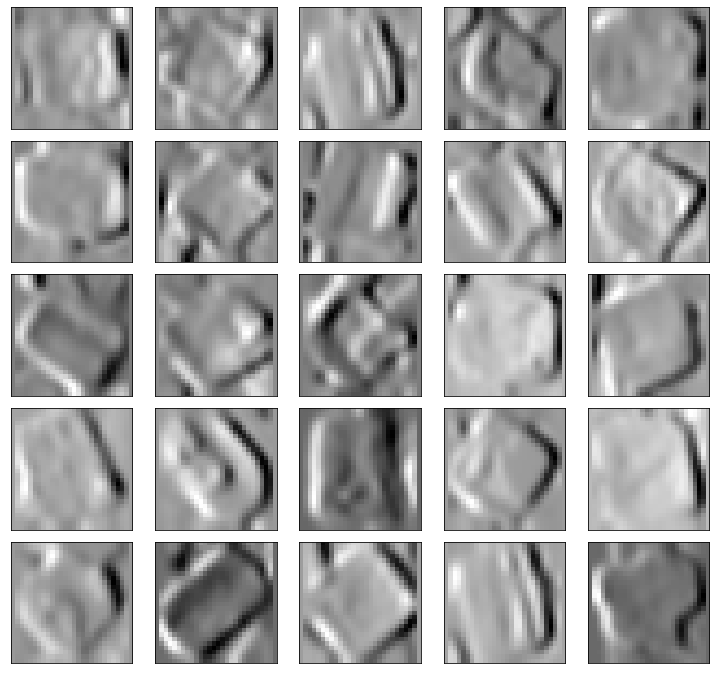

In [24]:

df = pd.DataFrame(train_images)
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[lista[i],:]).reshape(Size,Size)
  img = data
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto = cv2.Sobel(img28,cv2.CV_64F,1,0,ksize=5)
  #Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

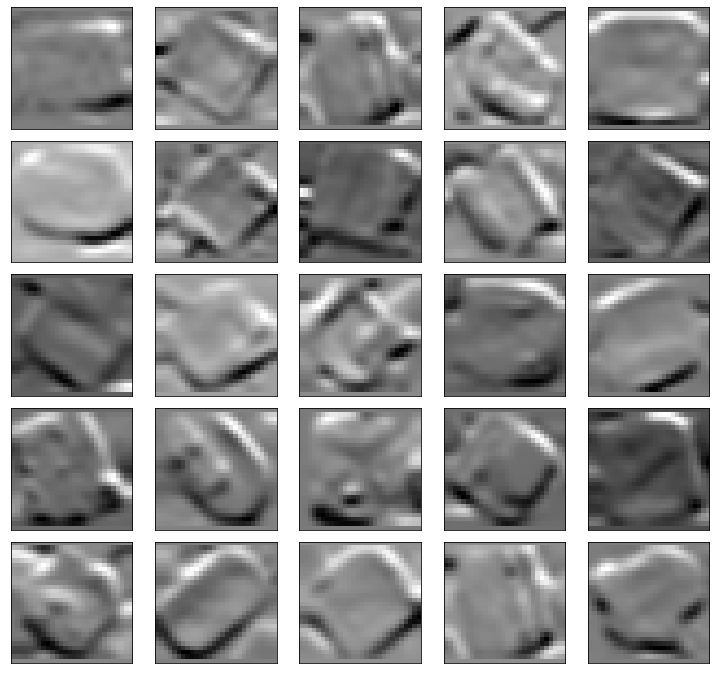

In [25]:

df = pd.DataFrame(train_images)
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[lista[i],:]).reshape(Size,Size)
  img = data
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto = cv2.Sobel(img28,cv2.CV_64F,0,1,ksize=5)
  #Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

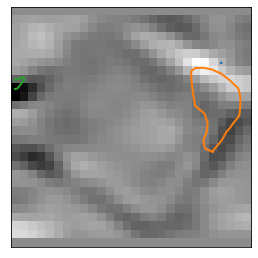

<Figure size 432x288 with 0 Axes>

In [31]:

df = pd.DataFrame(train_images)
Num = 1
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[lista[1],:]).reshape(Size,Size)
  img = data
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto = cv2.Sobel(img28,cv2.CV_64F,0,1,ksize=5)
  #fig, ax = plt.subplot()
  plt.subplot(Num,5,i+1)
  plt.imshow(Foto, cmap=plt.cm.gray)
  contours = measure.find_contours(img28, 0.8)
  for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.show()

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [ ]:

df = pd.DataFrame(train_images)
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[listaNG[i+100],:]).reshape(Size,Size)
  #img = Image.fromarray(data.astype('uint8'), mode='L')
  #img=np.float32(img)
  img = data
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [ ]:

df = train_images.copy()
df = pd.DataFrame(df)
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[i,:]).reshape(Size,Size)
  #img = Image.fromarray(data.astype('uint8'), mode='L')
  #img=np.float32(img)
  img = data
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)

In [ ]:
IndRef = 0
GaussRef = 6

In [ ]:
Size = 28
image = np.array(result_fotos.iloc[IndRef,:]).reshape(Size,Size)
img28=cv2.resize(image,(Size,Size), interpolation = cv2.INTER_AREA)
plt.imshow(img28, cmap = "gray")

In [ ]:
Size = 28
image = result_fotos.iloc[IndRef,:]
image = ndi.gaussian_filter(image, GaussRef)
img28=cv2.resize(image,(Size,Size), interpolation = cv2.INTER_AREA)
plt.imshow(img28, cmap = "gray")


In [ ]:
Size = 28
image = result_fotos.iloc[IndRef,:]
image = ndi.gaussian_filter(image, GaussRef)
img28=cv2.resize(image,(Size,Size), interpolation = cv2.INTER_AREA)
edges1 = feature.canny(img28)
plt.imshow(edges1, cmap = "gray")


In [ ]:
Size = 28
image = result_fotos.iloc[IndRef,:]
image = ndi.gaussian_filter(image, 4)
img28=cv2.resize(image,(Size,Size), interpolation = cv2.INTER_AREA)
edges2 = feature.canny(img28, sigma=3)
plt.imshow(edges2,cmap = "gray")

In [ ]:
image.shape

In [ ]:
Size = 28
image = np.array(result_fotos.iloc[IndRef,:]).reshape(Size,Size)
'''
N =int(28*28)
for  i in range(Size):
  for  j in range(Size):
    if(image[i,j] < (0.5*np.mean(image))):
      image[i,j] = 0
    else:
      image[i,j] =1
'''
image =(image*255).astype(np.uint8)
img28=cv2.resize(image,(Size,Size), interpolation = cv2.INTER_AREA)
img28 = np.uint8(img28)
edges = cv2.Canny(img28,100,200)
plt.imshow(edges,cmap = "gray")

In [ ]:
Size = 28
image = np.array(result_fotos.iloc[IndRef,:]).reshape(Size,Size)
img28=cv2.resize(image,(Size,Size), interpolation = cv2.INTER_AREA)
#plt.imshow(img28, cmap = "gray")
# Find contours at a constant value of 0.8
contours = measure.find_contours(img28, 0.6)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img28, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [ ]:
Size = 28
image = np.array(result_fotos.iloc[IndRef,:]).reshape(Size,Size)


In [ ]:
Size = 28
image = np.array(result_fotos.iloc[IndRef,:]).reshape(Size,Size)
img28=cv2.resize(image,(Size,Size), interpolation = cv2.INTER_AREA)
plt.imshow(img28, cmap = "gray")

In [ ]:
N =int(28*28)
for  i in range(Size):
  for  j in range(Size):
    if(image[i,j] < (0.7*np.mean(image))):
      image[i,j] = 0
    else:
      image[i,j] =1
img28=cv2.resize(image,(Size,Size), interpolation = cv2.INTER_AREA)
#plt.imshow(img28, cmap = "gray")
# Find contours at a constant value of 0.8
contours = measure.find_contours(img28, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img28, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)